In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import dirname, join as pjoin
from scipy.io import wavfile

# 1

In [2]:
data_dir = pjoin(dirname("QuizLab"))
wav_fname1 = pjoin(data_dir, 'file1.wav')
wav_fname2 = pjoin(data_dir, 'file2.wav')

In [3]:
samplerate1, data1 = wavfile.read(wav_fname1)
length1 = data1.shape[0] / samplerate1
data1=data1[:,0]

samplerate2, data2 = wavfile.read(wav_fname2)
length2 = data2.shape[0] / samplerate2
data2=data2[:,0]

C:\Users\BBB\AppData\Local\Temp\ipykernel_19200\2572603792.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read(wav_fname1)


In [4]:
def plot_time_domain(data,len,i):
    time = np.linspace(0., len, data.shape[0])
    plt.figure(figsize=(10,6))
    plt.plot(time, data)
    plt.grid()
    plt.title("time domain "+str(i))
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

#gpt
def plot_frequency_domain(wav_file,nf):
    # Read the wav file
    sample_rate, data = wavfile.read(wav_file)

    # If the audio is stereo, just use one channel
    if len(data.shape) > 1:
        data = data[:, 0]

    # Apply FFT to the audio signal
    n = len(data)
    yf = np.abs(np.fft.fft(data))
    xf = np.fft.fftfreq(n, 1 / sample_rate)

    yf_plot=np.copy(yf)
    xf_plot=np.copy(xf)

    # Only take the positive half of the frequencies (since FFT is symmetric)
    xf = xf[:n // 2]
    yf = np.abs(yf[:n // 2])

    pair = [[yf[i],xf[i]] for i in range(len(xf))]

    pair=sorted(pair)
    for i in range(3):
        print(str(i+1)+"th : "+str(pair[len(pair)-1-i]))
    

    # Plot the frequency domain
    plt.figure(figsize=(10, 6))
    plt.plot(xf_plot, yf_plot)
    plt.title("frequency domain "+str(nf))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

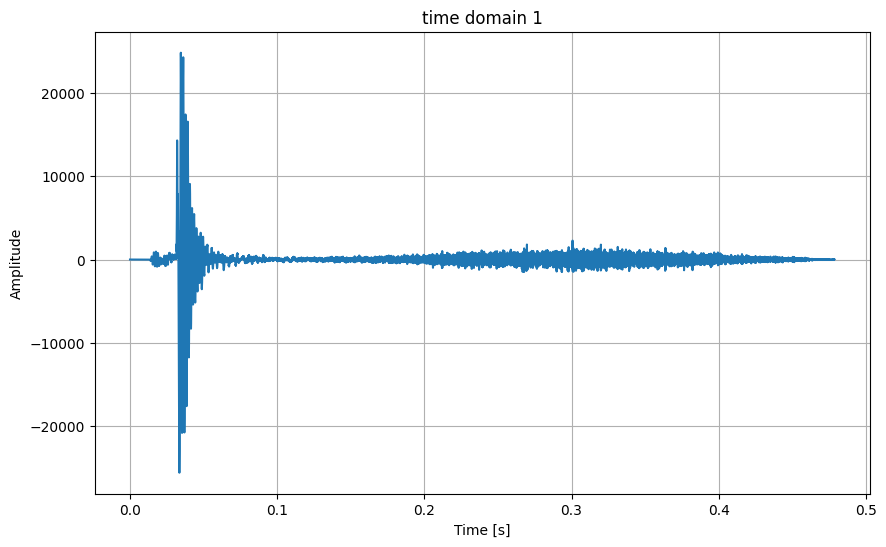

C:\Users\BBB\AppData\Local\Temp\ipykernel_19200\27264811.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(wav_file)


1th : [np.float64(3648752.6770928297), np.float64(660.1108426886457)]
2th : [np.float64(3628319.200444868), np.float64(658.021884325707)]
3th : [np.float64(3619890.9783373927), np.float64(662.1998010515845)]


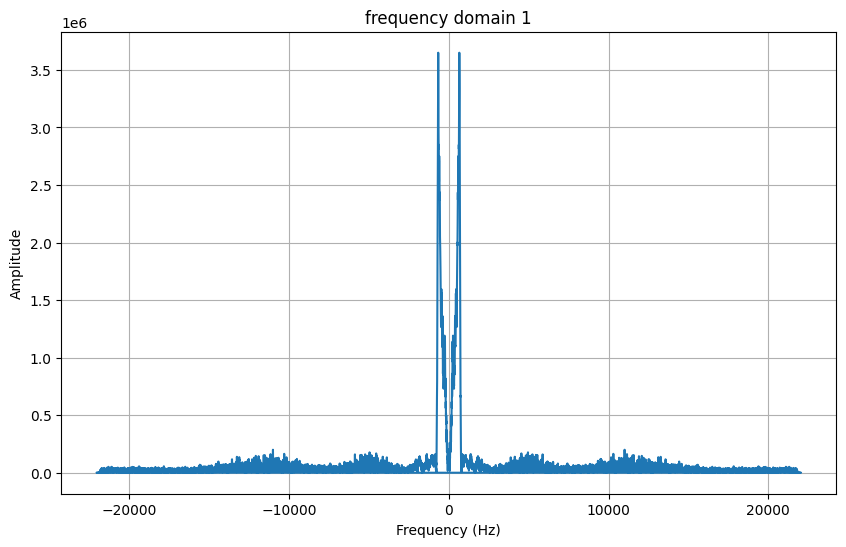

In [5]:
plot_time_domain(data1,length1,1)
plot_frequency_domain("file1.wav",1)

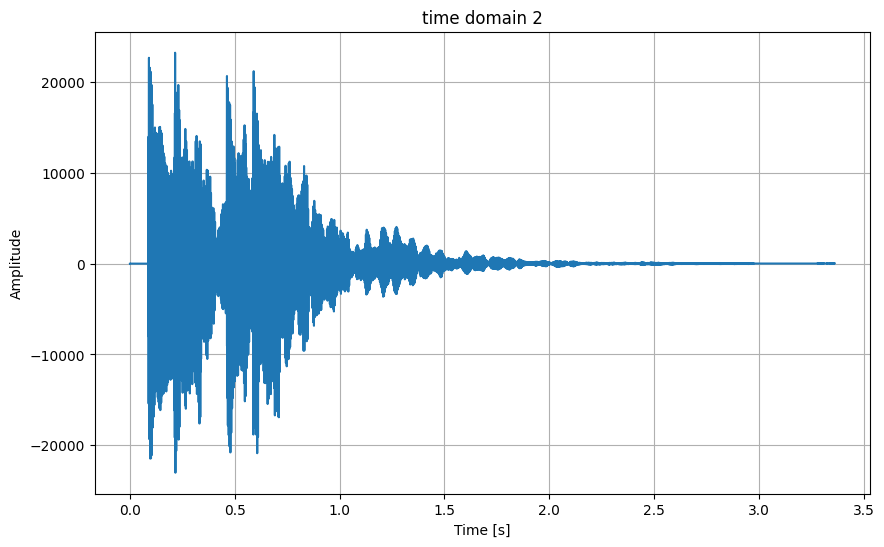

1th : [np.float64(78504093.79821084), np.float64(263.34664849327265)]
2th : [np.float64(62824651.68329405), np.float64(261.26368065208294)]
3th : [np.float64(61776464.546030626), np.float64(263.6442153277283)]


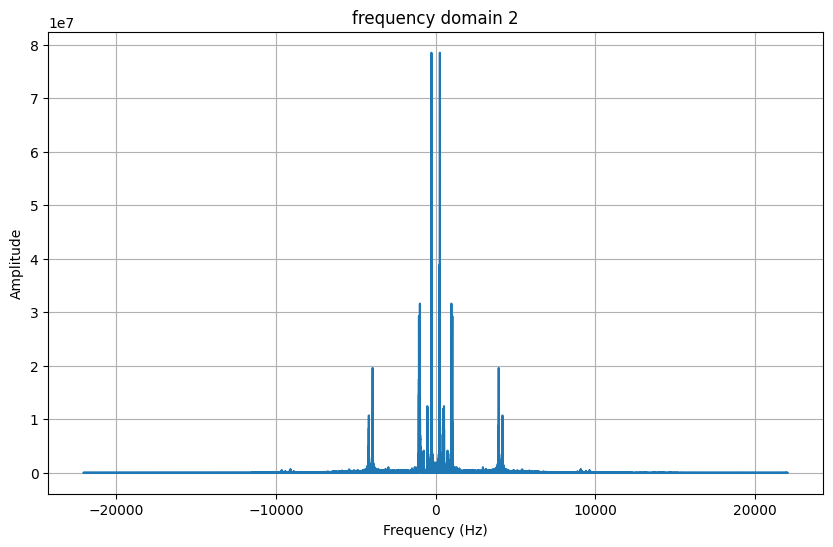

In [6]:
plot_time_domain(data2,length2,2)
plot_frequency_domain("file2.wav",2)

# 2

In [7]:
def H(w):
    return 2-2*np.e**(-2*1j*w)-np.e**(1j*w)

def magnitude(z):
    return np.power(np.power(z.real,2)+np.power(z.imag,2),0.5)

def phase(z):
    return np.arctan2(z.imag,z.real)

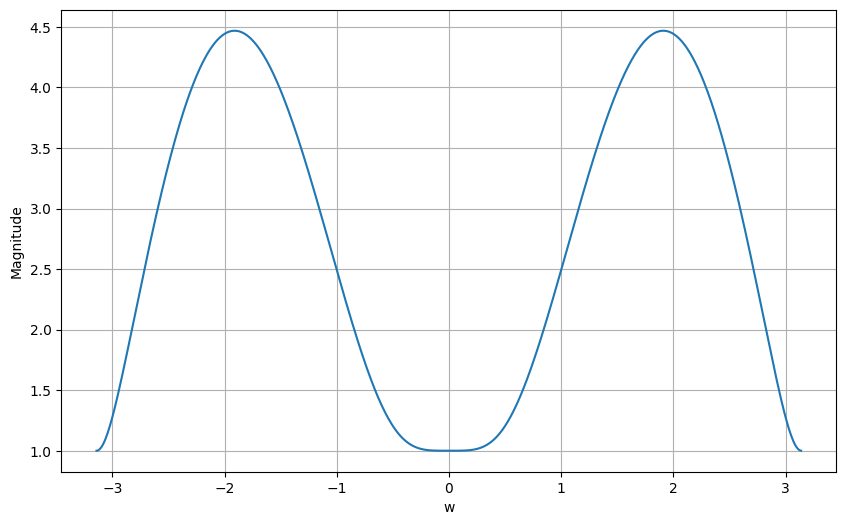

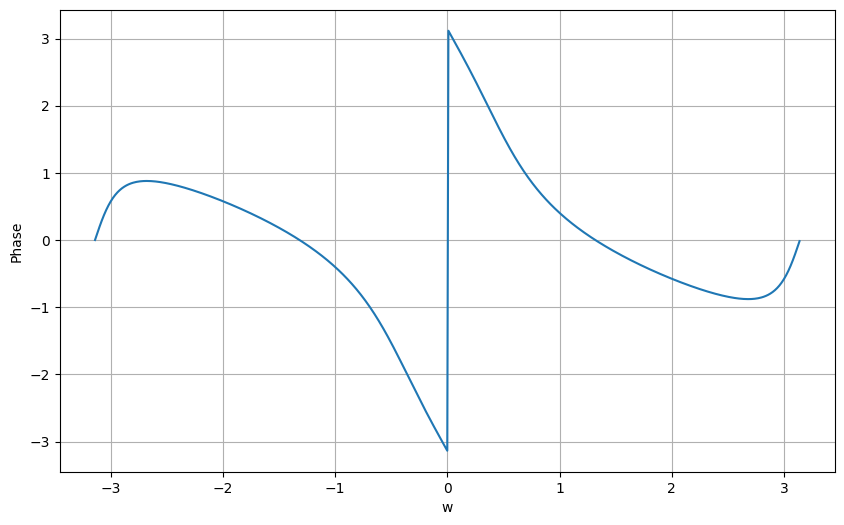

In [8]:
w = np.arange(-np.pi,np.pi,0.01)
H_e_jw = H(w)
m=magnitude(H_e_jw)
plt.figure(figsize=(10,6))
plt.xlabel("w")
plt.ylabel("Magnitude")
plt.plot(w,m)
plt.grid()
plt.show()

pha=phase(H_e_jw)
plt.figure(figsize=(10,6))
plt.xlabel("w")
plt.ylabel("Phase")
plt.plot(w,pha)
plt.grid()
plt.show()

In [9]:
n=np.arange(-1,10,1)
x=np.array([0,6,5,3,2,1,0,0,0,2,1])#pad 0
X=np.fft.fft(x)
h=np.array([-1,2,0,-2,0,0,0,0,0,0,0])#pad 0
H=np.fft.fft(h)
Y=X*H
print(X)
print(H)
print(Y)

[20.         +0.j          6.10052086-10.1947961j
 -3.99797511 -3.44992733j -5.43876331 -3.21204476j
 -4.56003934 -2.08503912j -2.1037431  -1.22454651j
 -2.1037431  +1.22454651j -4.56003934 +2.08503912j
 -5.43876331 +3.21204476j -3.99797511 +3.44992733j
  6.10052086+10.1947961j ]
[-1.        +0.j          0.96713674+0.89836125j  1.74981597-2.3827291j
 -2.1154597 -3.79890687j -3.99222853-0.43021751j -1.60926448+0.94803404j
 -1.60926448-0.94803404j -3.99222853+0.43021751j -2.1154597 +3.79890687j
  1.74981597+2.3827291j   0.96713674-0.89836125j]
[-20.        +0.00000000e+00j  15.05864763-4.37929035e+00j
 -15.21596296+3.48935371e+00j  -0.69677431+2.74563066e+01j
  17.30769883+1.02857614e+01j   4.54639081-2.38008638e-02j
   4.54639081+2.38008638e-02j  17.30769883-1.02857614e+01j
  -0.69677431-2.74563066e+01j -15.21596296-3.48935371e+00j
  15.05864763+4.37929035e+00j]


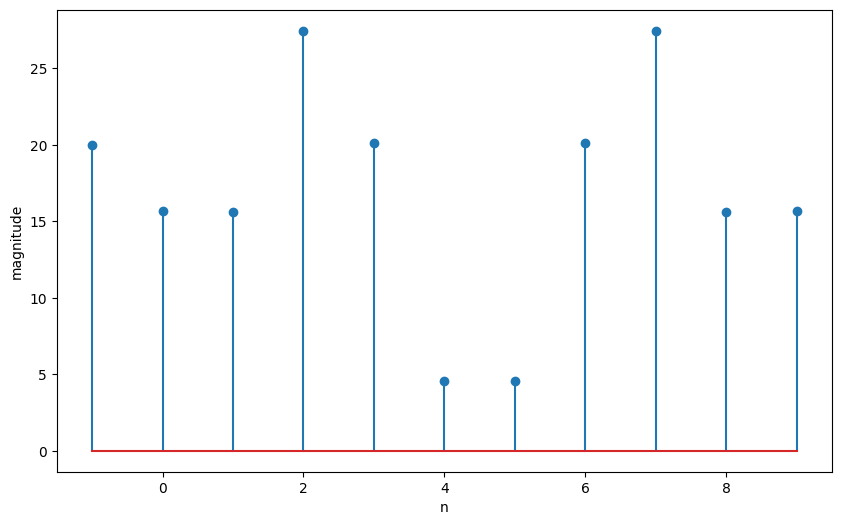

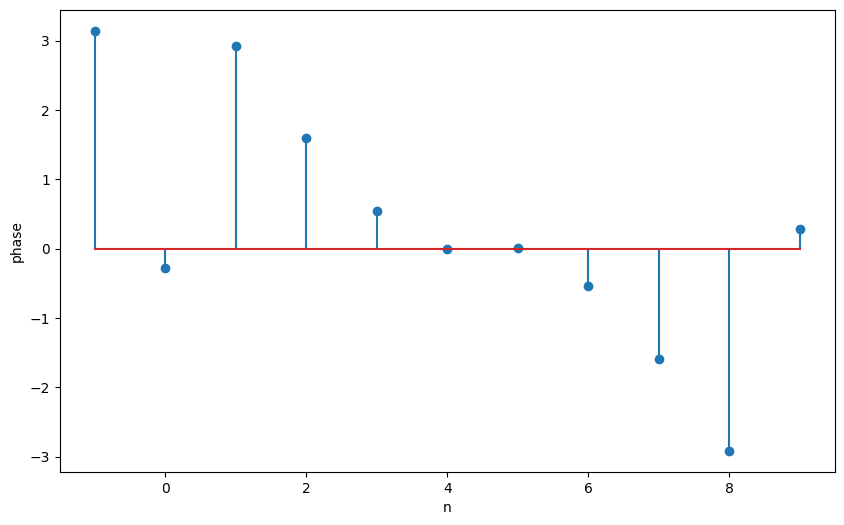

In [10]:
magY=magnitude(Y)
phaseY=phase(Y)
plt.figure(figsize=(10,6))
plt.stem(n,magY)
plt.xlabel("n")
plt.ylabel("magnitude")
plt.show()
plt.figure(figsize=(10,6))
plt.stem(n,phaseY)
plt.xlabel("n")
plt.ylabel("phase")
plt.show()